# William Jardee
## Homework 09: Solving 1-D Second Order ODE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Provided initial constants, these will be manipulated later
k = 1.00 #N/m
b = 0.800 #kg/2
F_0 = 0.800 #N
f = 1.50 #Hz
m = 1.20 #kg

In [3]:
def rk2(y0, t0, tf, dt, deriv_func):
    """
    General RK2 solver

    Inputs
    ----------
    y0:         Starting 'y' values. y0 Can be an array/list of any number of dimentions
    t0, tf:     Initial and Final independent variables
    dt:         Step size for the independent variable
    deriv_func: Derivative function that I want to solve for

    Output
    ----------
    t:  Array of independent variables
    y:  Array of dependent variables values. The first intex corresponds to the time step and the second corresponds to
        the dependent variable number
    """

    t = np.arange(t0, tf+dt, dt)
    n_steps = len(t)    # Number of steps to take

    y = np.zeros((n_steps, len(y0))) #Makes an array of zeros

    y[0,:] = y0 #Sets the first row in y to be the initial values.

    for n in range(n_steps-1):
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f
        #Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = (y[n,:] + dt*f_star)
    return t, y

In [4]:
#Forced damped oscilator dif eq, written overly simply
def damped_oscilator(x,t):
    dxdt = x[1]
    dvdt = -(k/m)*x[0] - (b/m)*x[1] + F_0*np.cos(2*np.pi*f*t)
    return np.array([dxdt, dvdt])

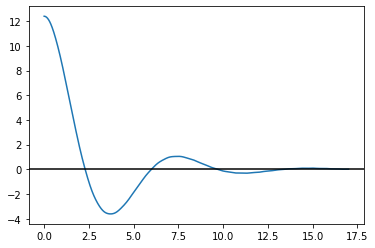

In [5]:
#Plotting the intial conditions as they go off to a steady state

t,x = rk2([12.4, 0], 0, 17, 0.001, damped_oscilator)

plt.plot(t, x[:,0])
plt.axhline(y=0, color = "black")
plt.show()

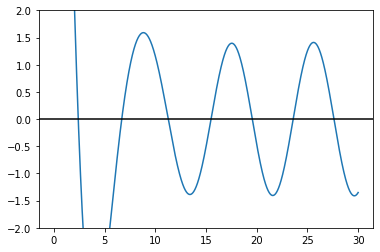

0.1244171422220045


In [6]:
#As I was playing around I approched this value, but looked up the solution to ensure the highest resonance.

f = np.sqrt(k/m-2*(b/(2*m))**2)/(2*np.pi)
t,x = rk2([12.4, 0], 0, 30, 0.001, damped_oscilator)

plt.plot(t, x[:,0])
plt.axhline(y=0, color = "black")
plt.ylim(-2,2)
plt.show()

print(f)

A close approx for the freq that gives resonance is 0.124Hz

In [7]:
#Using the common solution of Ae^(beta*t)*cos(w*t-delta) to write the analytical solutions with initial conditions
#If this was going to be used more, I would build a lambda function that does the calculations before hand.
#This program is small enough that I don't care.

def analytical_x(t):
    beta = b/(2*m)
    w = np.sqrt(k/m-beta**2)
    x_0 = 12.4
    delta = np.arctan(beta/w)
    A = x_0/np.cos(delta)
    return A*np.exp(-beta *t)*np.cos(w*t-delta)

def analytical_v(t):
    beta = b/(2*m)
    w = np.sqrt(k/m-beta**2)
    x_0 = 12.4
    delta = np.arctan(beta/w)
    A = x_0/np.cos(delta)
    return -A*beta*np.exp(-beta *t)*np.cos(w*t-delta) - A*w*np.exp(-beta*t)*np.sin(w*t-delta)

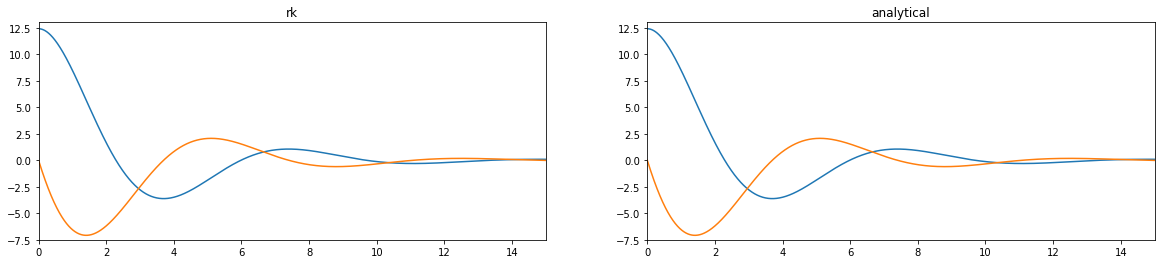

In [8]:
#Testing my analytical solutions to make sure they match the provided diff eq
fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1))

F_0 = 0
t,x = rk2([12.4, 0], 0, 15, 0.001, damped_oscilator)
ax1.plot(t, x[:,0])
ax1.plot(t, x[:,1])
ax1.set_title("rk")
ax1.set_ylim(-7.5, 13)
ax1.set_xlim(0, 15)

ax2.plot(t, analytical_x(t))
ax2.plot(t, analytical_v(t))
ax2.set_title("analytical")
ax2.set_ylim(-7.5, 13)
ax2.set_xlim(0, 15)


plt.show()
#They match, we're good

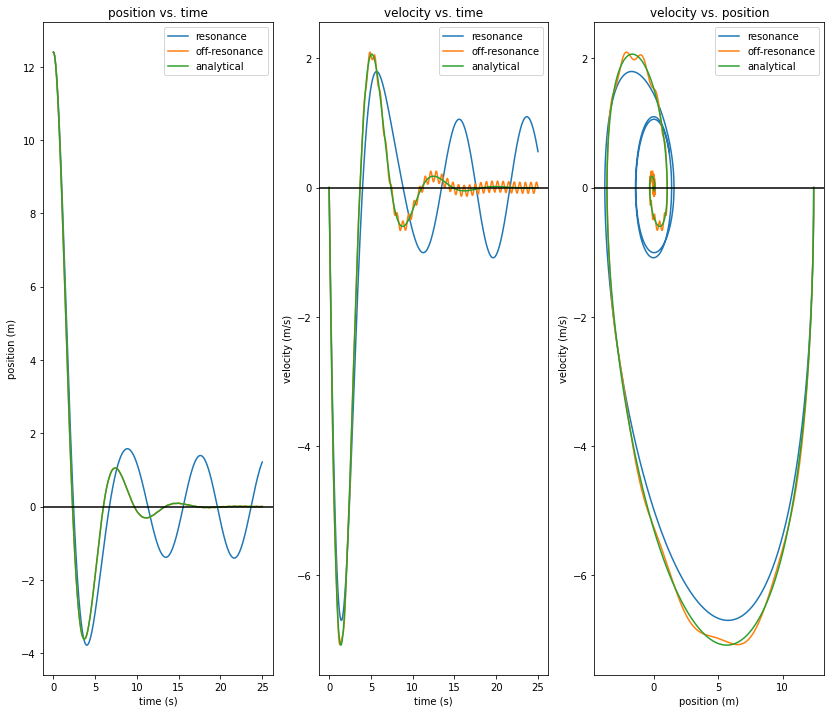

In [11]:
#Reseting to out initial condition and getting the data set up
F_0 = 0.800

f = 0.124
t1,x1 = rk2([12.4, 0], 0, 25, 0.001, damped_oscilator)
f = 1.5
t2,x2 = rk2([12.4, 0], 0, 25, 0.001, damped_oscilator)


#Plotting the three next to each other
gridsize = (1,3)
fig = plt.figure(figsize=(14, 12))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (0, 2))

#Plotting position
ax1.plot(t1, x1[:,0], label = "resonance")
ax1.plot(t2, x2[:,0], label = "off-resonance")
ax1.plot(t1, analytical_x(t1), label = "analytical")      #analytical and off-resonance overlap perfectly
ax1.set_xlabel("time (s)")
ax1.set_ylabel("position (m)")
ax1.set_title("position vs. time")
ax1.axhline(y=0, color = "black")

#Plotting Velocity
ax2.plot(t1, x1[:,1], label = "resonance")
ax2.plot(t2, x2[:,1], label = "off-resonance")
ax2.plot(t1, analytical_v(t1), label = "analytical")
ax2.set_xlabel("time (s)")
ax2.set_ylabel("velocity (m/s)")
ax2.set_title("velocity vs. time")
ax2.axhline(y=0, color = "black")

#Plotting Phase Plane
ax3.plot(x1[:,0],x1[:,1], label = "resonance")
ax3.plot(x2[:,0],x2[:,1], label = "off-resonance")
ax3.plot(analytical_x(t1),analytical_v(t1), label = "analytical")
ax3.set_xlabel("position (m)")
ax3.set_ylabel("velocity (m/s)")
ax3.set_title("velocity vs. position")
ax3.axhline(y=0, color = "black")

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()